In [ ]:
!pip install pingouin

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [270]:
import pingouin as pg

# Part 1 - Prepare SQLAlchemy 

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy import create_engine

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [134]:
# Preview the data model in Db Browser or a similar tool
# (do this to get a sense as to how the database is structured)
query = '''
SELECT
	*
FROM
	station
Inner Join measurement
	using(station)'''

hawaii_df = pd.read_sql(query, conn)
hawaii_df

,id,station,name,latitude,longitude,elevation,id,date,prcp,tobs
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,1,2010-01-01,0.08,65.0
1,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,2,2010-01-02,0.00,63.0
2,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,3,2010-01-03,0.00,74.0
3,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,4,2010-01-04,0.00,76.0
4,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0,5,2010-01-06,NaN,73.0
...,...,...,...,...,...,...,...,...,...,...
19545,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,19546,2017-08-19,0.09,71.0
19546,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,19547,2017-08-20,NaN,78.0
19547,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,19548,2017-08-21,0.56,76.0
19548,9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.4,19549,2017-08-22,0.50,76.0


# Part 2 - Exploratory Climate Analysis

In [135]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

query = '''SELECT
	date
	,AVG(prcp) As precipitation
FROM
	station
Inner Join measurement
	using(station)
Group By
	date
Having date Between 
	(Select Date(Max(date),'-1 year') From measurement)
AND
	(Select Max(date) From measurement)
Order by date
'''
prec_12 = pd.read_sql(query, conn)
prec_12.set_index('date', inplace = True)
prec_12

,precipitation
date,
2016-08-23,0.451667
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


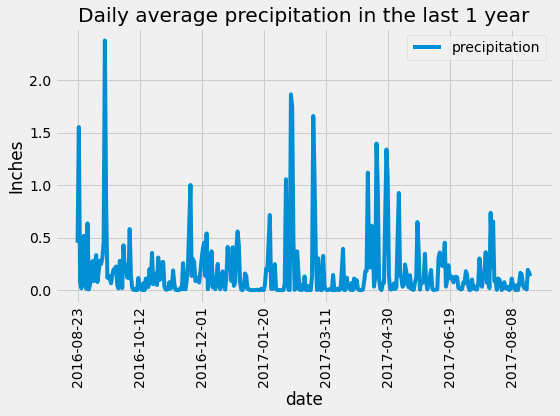

<Figure size 432x288 with 0 Axes>

In [317]:
# Use Pandas Plotting with Matplotlib to plot the data

prec_12.plot(rot=90, figsize = (8,6))
plt.title('Daily average precipitation in the last 1 year')
plt.ylabel('Inches')
plt.tight_layout()
plt.show()
plt.savefig('images/LinePlot.png')

In [156]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_prec = prec_12.describe().round(2)
summary_prec

,precipitation
count,366.00
mean,0.17
std,0.30
min,0.00
25%,0.01
50%,0.07
75%,0.19
max,2.38


In [262]:
# Design a query to show how many stations are available in this dataset?
query = '''SELECT
	DISTINCT station,
    name
FROM
	station
Inner Join measurement
	using(station)'''

stations = pd.read_sql(query, conn)

print(f'Total number of stations is {len(stations)}')
stations

Total number of stations is 9


,station,name
0,USC00519397,"WAIKIKI 717.2, HI US"
1,USC00513117,"KANEOHE 838.1, HI US"
2,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US"
3,USC00517948,"PEARL CITY, HI US"
4,USC00518838,"UPPER WAHIAWA 874.3, HI US"
5,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US"
6,USC00519281,"WAIHEE 837.5, HI US"
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US"
8,USC00516128,"MANOA LYON ARBO 785.2, HI US"


In [139]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
query = '''
SELECT
	station,
	name,
	count(station) as count
	
FROM
	station
Inner Join measurement
	using(station)
Group By
	station
Order by count DESC
'''
active_station = pd.read_sql(query, conn)
active_station

,station,name,count
0,USC00519281,"WAIHEE 837.5, HI US",2772
1,USC00519397,"WAIKIKI 717.2, HI US",2724
2,USC00513117,"KANEOHE 838.1, HI US",2709
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2669
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",2612
5,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",2202
6,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",1979
7,USC00517948,"PEARL CITY, HI US",1372
8,USC00518838,"UPPER WAHIAWA 874.3, HI US",511


In [153]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active_id = active_station['station'].values[0]
query = f'''
SELECT
	Min(tobs) as min_temp
	,round(Avg(tobs),1) as ave_temp
	,max(tobs) as max_temp
FROM
	station
Inner Join measurement
	using(station)
where station = '{most_active_id}'
'''

stats_active_station =  pd.read_sql(query, conn)
stats_active_station

,min_temp,ave_temp,max_temp
0,54.0,71.7,85.0


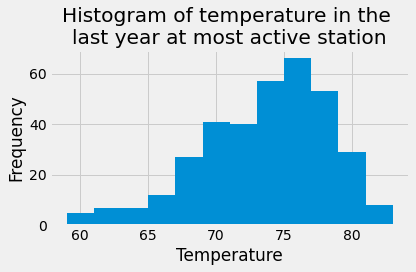

In [314]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
query = f'''
SELECT
	date
	,tobs
FROM
	station
Inner Join measurement
	using(station)
where station = '{most_active_id}'
AND date Between 
	(Select Date(Max(date),'-1 year') From measurement)
AND
	(Select Max(date) From measurement)	
'''
stats_active_station_last1year = pd.read_sql(query, conn)

stats_active_station_last1year.hist(bins=12)
plt.title('Histogram of temperature in the \nlast year at most active station')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('images/Histogram.png')
plt.show()

## Part 3 - Data Analysis Assignment

   ###      Temperature Analysis I

In [272]:
#Average Temperature for month of June 
trip_days.strftime('%m')
month = '06'
query = f'''
           SELECT
                 Min(tobs) as min_temp
                ,round(Avg(tobs),1) as ave_temp
                ,max(tobs) as max_temp 
            FROM
                station
            Inner Join measurement
                using(station)
            where strftime("%m", date) = '{month}'   
    '''

stats_in_month_june = pd.read_sql(query, conn)
stats_in_month_june

,min_temp,ave_temp,max_temp
0,64.0,74.9,85.0


In [280]:
#Average Temperature for month of Decemeber 
month = '12'
query = f'''
           SELECT
                 Min(tobs) as min_temp
                ,round(Avg(tobs),1) as ave_temp
                ,max(tobs) as max_temp 
            FROM
                station
            Inner Join measurement
                using(station)
            where strftime("%m", date) = '{month}'   
    '''

stats_in_month_dec = pd.read_sql(query, conn)
stats_in_month_dec

,min_temp,ave_temp,max_temp
0,56.0,71.0,83.0


In [311]:
#Temperature set for month of Decemeber 
month = '12'
query = f'''
           SELECT
                 
               tobs
                
            FROM
                station
            Inner Join measurement
                using(station)
            where strftime("%m", date) = '{month}'   
    '''

array_in_month_dec = pd.read_sql(query, conn)


#Temperature set for month of June 
trip_days.strftime('%m')
month = '06'
query = f'''
           SELECT
                
               tobs
               
            FROM
                station
            Inner Join measurement
                using(station)
            where strftime("%m", date) = '{month}'   
    '''

array_in_month_june = pd.read_sql(query, conn)


In [313]:
# t test on means
june_array = array_in_month_june['tobs'].values
dec_array = array_in_month_dec['tobs'].values
res = pg.ttest(june_array, dec_array, correction=False)
res

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,31.603724,3215,two-sided,3.902513e-191,"[3.66, 4.14]",1.116212,9.68e+186,1.0


#### The p-value of the test is 3.902513e-191, which is less than the significance level alpha (e.g., 0.05). This means that we can conclude that the Average Temperature in Hawai in June is statistically different from the Average Temperature in Hawai in December.

### Temperature Analysis II

In [182]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    query = f'''
            SELECT
                 Min(tobs) as min_temp
                ,round(Avg(tobs),1) as ave_temp
                ,max(tobs) as max_temp 
            FROM
                station
            Inner Join measurement
                using(station)
            where date Between 
                '{start_date}'
            AND
                '{end_date}'	
           
    '''

    stats_btwn_dates = pd.read_sql(query, conn)
      
    return stats_btwn_dates

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

   min_temp  ave_temp  max_temp
0      62.0      69.6      74.0


In [183]:
calc_temps('2011-02-28', '2011-03-05')

,min_temp,ave_temp,max_temp
0,61.0,69.8,75.0


In [184]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
calc_temps('2011-02-28', '2011-03-05')

,min_temp,ave_temp,max_temp
0,61.0,69.8,75.0


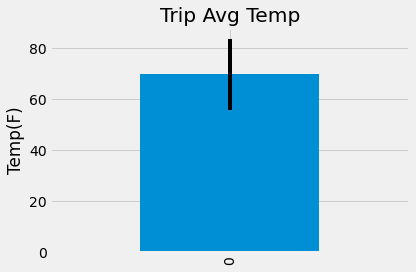

,min_temp,ave_temp,max_temp
0,61.0,69.8,75.0


In [315]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
df = calc_temps('2011-02-28', '2011-03-05')
yerr = (df['max_temp'] - df['min_temp']).values[0]
df['ave_temp'].plot(kind = 'bar', yerr = yerr)
plt.title('Trip Avg Temp')
plt.ylabel('Temp(F)')
plt.tight_layout()
plt.savefig('images/ErrorBar.png')
plt.show()
df

In [212]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
start_date = '2011-02-28' 
end_date = '2011-03-05'
query = f'''
        SELECT
            station,
            name,
            sum(prcp) as total_precipitation,
            latitude,
            longitude,
            elevation

        FROM
            station
        Inner Join measurement
            using(station)
        Where date Between 
                '{start_date}'
            AND
                '{end_date}'
        Group By
            station
        Order by total_precipitation DESC
        '''
rainfall_btwn_dates = pd.read_sql(query, conn)
rainfall_btwn_dates

,station,name,total_precipitation,latitude,longitude,elevation
0,USC00518838,"UPPER WAHIAWA 874.3, HI US",2.33,21.49920,-158.01110,306.6
1,USC00519281,"WAIHEE 837.5, HI US",2.23,21.45167,-157.84889,32.9
2,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",2.19,21.33556,-157.71139,19.5
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",1.96,21.52130,-157.83740,7.0
4,USC00516128,"MANOA LYON ARBO 785.2, HI US",1.45,21.33310,-157.80250,152.4
5,USC00513117,"KANEOHE 838.1, HI US",1.44,21.42340,-157.80150,14.6
6,USC00519397,"WAIKIKI 717.2, HI US",1.38,21.27160,-157.81680,3.0
7,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",0.63,21.31520,-157.99920,0.9
8,USC00517948,"PEARL CITY, HI US",NaN,21.39340,-157.97510,11.9


In [222]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A DataFrame containing the daily normals, tmin, tavg, and tmax
    
    """
    query = f'''
           SELECT
                 Min(tobs) as min_temp
                ,round(Avg(tobs),1) as ave_temp
                ,max(tobs) as max_temp 
            FROM
                station
            Inner Join measurement
                using(station)
            where strftime("%m-%d", date) = '{date}'  
       '''

    daily_normals = pd.read_sql(query, conn)   
    # your code here
    
    return tuple(daily_normals.values[0])
    
daily_normals("01-01")

(64.0, 70.0, 76.0)

In [254]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
   
# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date

normals = []

trip_days = pd.date_range(start=start_date, end=end_date) 

for x in trip_days.strftime('%m-%d') :
    normals.append(daily_normals(x))
   
    
normals


[(65.0, 70.7, 80.0),
 (64.0, 70.0, 76.0),
 (61.0, 70.4, 78.0),
 (60.0, 70.1, 78.0),
 (57.0, 69.3, 77.0),
 (60.0, 67.9, 76.0)]

In [255]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_df = pd.DataFrame(normals, columns =["Min_Temp", "Ave_Temp", "Max_Temp"], index = trip_days )
trip_df

,Min_Temp,Ave_Temp,Max_Temp
2011-02-28,65.0,70.7,80.0
2011-03-01,64.0,70.0,76.0
2011-03-02,61.0,70.4,78.0
2011-03-03,60.0,70.1,78.0
2011-03-04,57.0,69.3,77.0
2011-03-05,60.0,67.9,76.0


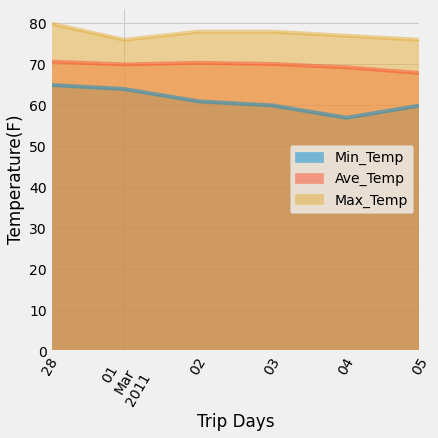

In [316]:
# Plot the daily normals as an area plot with `stacked=False`
trip_df.plot(kind = "area",stacked=False, rot = 60, figsize=(6,6))
plt.legend(loc="right")
plt.tight_layout()
plt.xlabel('Trip Days')
plt.ylabel('Temperature(F)')
plt.savefig('images/AreaPlot.png')
plt.show()